# 비계층적 클러스터링

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 라이브러리와 데이터 준비

In [1]:
from sklearn.datasets import make_blobs


data, label = make_blobs(n_samples=1500, random_state=170)

In [2]:
data

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]], shape=(1500, 2))

In [3]:
label

array([1, 1, 0, ..., 2, 2, 2], shape=(1500,))

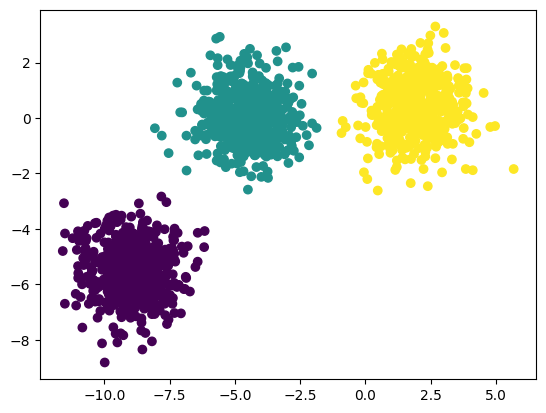

In [6]:
plt.scatter(data[:, 0], data[:, 1], c=label)